<a href="https://colab.research.google.com/github/PGV1000/DeepLearning/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%205/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%965_%D0%9C%D0%B5%D0%B4%D0%B2%D0%B5%D0%B4%D0%B5%D0%B2_%D0%94_%D0%93_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Использование предобученной модели

### 1.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [ ]:
# Ваш код
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tensorflow import keras
from google.colab import files
from io import BytesIO
from PIL import Image
from urllib.request import urlopen

model = keras.applications.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

model.summary() # Вывод краткого описания архитектуры созданной модели
model.get_config() # Вывод конфигурации созданной модели

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

{'name': 'mobilenetv2_1.00_224',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'Conv1',
    'trainable': True,
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (2, 2),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'linear',
    'use_bias': False,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    '

### 1.2. Загрузите из сети Интернет 5 изображений с разными классами, из тех, что приведены в [списке](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), и сохраните их представление в список images

In [ ]:
from google.colab.patches import cv2_imshow
# Ваш код
req1 = urlopen('https://i.pinimg.com/originals/b4/30/63/b430639b2d06ae0a07f33b85ad36542e.jpg') # magpie используя метод urlopen, получаем объект запроса по ссылке (изображение)
req2 = urlopen('https://adirondackwildlife.org/great-gray-owl-annefraser-78674954_113221200144180_3149966217893117952_o.jpg') # great grey owl используя метод urlopen, получаем объект запроса по ссылке (изображение)
req3 = urlopen('https://aquarium-fish-home.ru/wp-content/uploads/2016/10/smiling-.jpg') # axolotl используя метод urlopen, получаем объект запроса по ссылке (изображение)
req4 = urlopen('https://i.pinimg.com/originals/54/8e/e3/548ee3579e12ee0ccd0afd69bf4c76d0.jpg') # green mamba используя метод urlopen, получаем объект запроса по ссылке (изображение)
req5 = urlopen('https://gas-kvas.com/grafic/uploads/posts/2023-09/1695821915_gas-kvas-com-p-kartinki-flamingo-1.jpg') # flamingo используя метод urlopen, получаем объект запроса по ссылке (изображение)

reqs = [req1, req2,req3, req4, req5]
images = []
for req in reqs:                                                                                      # и сохраняем его в виде потокового набора данных в переменную "req"
  image = np.asarray(bytearray(req.read()), dtype=np.uint8) # преобразуем потоковый набор данных в массив numpy
  image = cv2.imdecode(image, -1)
  images.append(image) # декодируем изображение в привычный для отображения формат


(596, 900, 3)


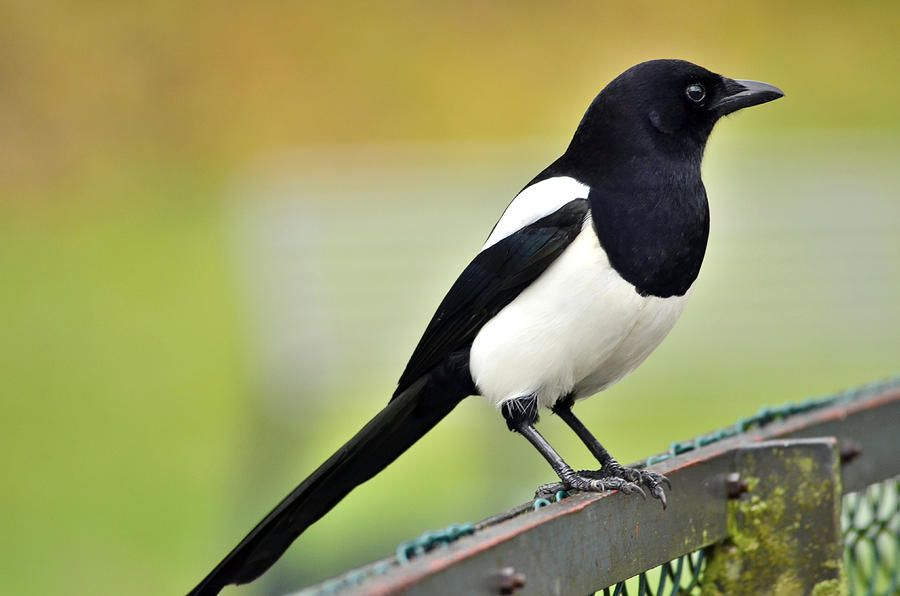

In [ ]:
print(images[0].shape)
cv2_imshow(images[0])

### 1.3. Напишите функцию, принимающую на вход список с исходными изображениями и возвращающую список с преобразованными изображениями под формат входных данных выбранной Вами модели СНС (нормализация).

(Не забудьте создать независимую копию исходного списка в теле функции, для обработки именно независимой копии, а не оригинального списка)

In [ ]:
# Ваш код
def normalize(images, shape):
  images_orig = images
  proc_images = []
  for image in images:
    proc_image = np.array(image)
    proc_image = cv2.resize(proc_image, (shape[0], shape[1]))
    proc_image = proc_image.reshape(-1, shape[0], shape[1], shape[2])
    proc_image = keras.applications.mobilenet_v2.preprocess_input(proc_image)
    proc_images.append(proc_image)
  return (proc_images)

In [ ]:
input_images = normalize(images, (224,224,3))

# input_images = []
# for normalized_image in normalized_images:
#   input_image = keras.applications.mobilenet_v2.preprocess_input(normalized_image)
#   input_images.append(input_image) # Здесь метод preprocess_input преобразовывает изображение из формата RGB в формат BGR (на котором обучалась сеть VGG-16) и,
                                        # кроме того, уменьшает средние значения каждого цветового канала на величины: (B) 103.939, (G) 116.779 и (R) 123.68

In [ ]:
print(input_images[0].shape)


(1, 224, 224, 3)


### 1.5. Выведите изображения и соответствующие им классы (как в примере из теории)

In [ ]:
# Ваш код
for input_image in input_images:
  res = model.predict(input_image)
  print(keras.applications.vgg16.decode_predictions(res, top=1))
  print(np.argmax(res)) # Вывод номера класса объекта

1/1 [==============================] - 3s 3s/step
[[('n01582220', 'magpie', 0.9437581)]]
18
1/1 [==============================] - 0s 21ms/step
[[('n01622779', 'great_grey_owl', 0.83325714)]]
24
1/1 [==============================] - 0s 33ms/step
[[('n01632777', 'axolotl', 0.97837013)]]
29
1/1 [==============================] - 0s 24ms/step
[[('n01729977', 'green_snake', 0.5791915)]]
55
1/1 [==============================] - 0s 23ms/step
[[('n02007558', 'flamingo', 0.44275463)]]
130


# Задание 2. Использование обученной модели для работы со своим датасетом

### 2.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tensorflow import keras
from google.colab import files
from io import BytesIO
from PIL import Image
from urllib.request import urlopen
import pickle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from imutils import paths
import os
import tensorflow as tf
import random

### 2.2. Подготовка тренировочных данных. Разделение на обучающую и тестовую выборку

In [75]:
# Загружаем датасет из гугл-диска
%%capture
DATADIR = 'Dataset' # Папка с датасетом
if os.path.isdir(DATADIR)>0: # Если папка уже есть, то ничего не скачиваем
    print ('Data directory already exists and it is not empty, miss downloading')
else: # Иначе скачиваем и распаковываем
    print ('Data directory does not exists or it is empty, download the dataset')
    !gdown --id 12WJMUF37LCDiohHW9ILwq6NP4jIWlO-O #Скопировать ID из ссылки на файл в гугл диске, предварительно нужно открыть доступ по ссылке.
    !unzip Dataset.zip # Распаковка архива

In [76]:
# # инициализируем данные и метки
data = []
labels = []

In [77]:
# # Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/Dataset")))
random.shuffle(imagePaths)

In [78]:
img_h = 96 # Высота изображения в пикселях
img_w = 96 # Ширина изображения в пикселях
img_ch = 3 # Количество каналов в изображении

In [79]:
# Обработка изображений перед их подачей на обучение нейросети
# На вход идет массив с путями к изображениям и их требуемый размер в виде кортежа (высота, ширина, каналы)
def normalize(images, shape):
  proc_images = []
  for image in images:
    proc_image = cv2.imread(image)
    proc_image = cv2.resize(proc_image, (shape[0], shape[1]))
    proc_image = keras.applications.mobilenet_v2.preprocess_input(proc_image)
    proc_images.append(proc_image)
  return (np.array(proc_images))

In [80]:
# # цикл по изображениям
data = normalize(imagePaths, (img_h,img_w,img_ch))
for imagePath in imagePaths:
 # меняем его разрешение на h*w пикселей (без учета соотношения сторон) а затем "выраниваем" его в вектор, состоящий из (32*32*3) 3072 пикселей
 # добавляем в список
	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

In [81]:
# # масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
labels = np.array(labels)

### 2.3. Обучение своей модели на основе предобученной модели "*название модели, выбранной в п.2.1.*"

In [82]:
# # разбиваем данные на обучающую и тестовую выборки, используя 75%
# # данных для обучения и оставшиеся 25% для тестирования
(trainX, valX, trainY, valY) = train_test_split(data,
	labels, test_size=0.25, random_state=28)

In [83]:
# Преобразование буквенных меток в числовые значения
label_mapping = {label: i for i, label in enumerate(np.unique(labels))}

# Замена строковых меток числовыми значениями в обучающей и тестовой выборках
trainY = np.array([label_mapping[label] for label in trainY])
valY = np.array([label_mapping[label] for label in valY])

In [84]:
# # Добавляем предобученную модель
base_model = tf.keras.applications.MobileNetV2(include_top=False, # убираем полносвязные слои
                   input_shape=(img_h,img_w,img_ch), # меняем параметры входных данных на свои
                   pooling='avg', # значение параметра означает, что после последнего сверточного слоя будет применена операция среднего пулинга
                   weights='imagenet') # указываем используемые веса (путь к файлу с предобученными весами)
base_model.summary()

Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 48, 48, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 48, 48, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 48, 48, 32)           0         ['bn_Conv1[0

In [85]:
base_model.trainable = False # замораживаем все слои базовой модели

In [86]:
# определим архитектуру 3072-1024-512-3 с помощью Keras
my_model = Sequential()
my_model.add(base_model)
my_model.add(Flatten())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(len(label_mapping), activation='softmax'))

my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_96 (Funct  (None, 1280)              2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               655872    
                                                                 
 dense_3 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 2916934 (11.13 MB)
Trainable params: 658950 (2.51 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [87]:
# инициализируем скорость обучения и общее число эпох
LR = 0.001
EPOCHS = 2

In [88]:
# компилируем модель, используя SGD как оптимизатор и категориальную
# кросс-энтропию в качестве функции потерь (для бинарной классификации
# следует использовать binary_crossentropy)
my_model.compile(optimizer=Adam(learning_rate=LR),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [89]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=2) # Остановка обучения, если валидационная точность не улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model_.keras",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели только при улучшении валидационной точности

In [90]:
# Ваш код
# обучаем нейросеть
H = my_model.fit(trainX, trainY, validation_data=(valX, valY),
	epochs=EPOCHS, batch_size=50, callbacks=[early_stopping, checkpoint])

Epoch 1/2
99/99 [==============================] - 26s 240ms/step - loss: 0.0781 - accuracy: 0.9754 - val_loss: 6.7464e-04 - val_accuracy: 1.0000
Epoch 2/2


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


99/99 [==============================] - 21s 208ms/step - loss: 4.2869e-04 - accuracy: 1.0000 - val_loss: 3.5515e-04 - val_accuracy: 1.0000


### 2.4. Визуализация процесса обучения модели

In [91]:
from keras.models import load_model
model = load_model("/content/best_model.keras")

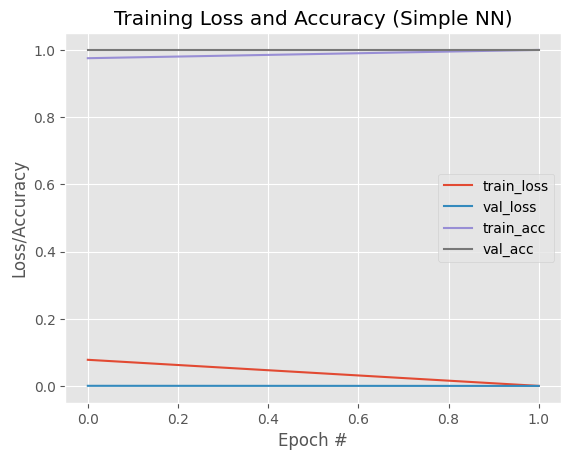

In [92]:
# строим графики потерь и точности
N = np.arange(0, H.params['epochs'])
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')

### 2.5. Подготовьте набор проверочных данных (examples)

In [93]:
def save_model_and_labels(model, lb, model_path = "model.keras", labels_path = "label_bin"):
    """
    Сохраняет модель машинного обучения и метки классов в бинарном формате на диск.

    Args:
        model: Модель машинного обучения.
        lb: Метки классов.
        model_path: Путь к файлу модели.
        labels_path: Путь к файлу меток.

    Returns:
        None.
    """
    # Сохранение модели
    model.save(model_path, save_format="keras")
    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

In [94]:
model_path = "model.keras"
labels_path = "label_bin"
save_model_and_labels(model, label_mapping, model_path, labels_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 2.6. Реализуйте графический интерфейс для взаимодействия с обученной моделью, используя [Gradio](https://www.gradio.app/guides/image-classification-in-tensorflow). В качестве примеров (параметр examples в Gradio), используйте изображения из списка images (п.1.2.)

In [95]:
!pip install -q gradio

In [96]:
def normalize(images, shape):
  proc_images = []
  for image in images:
    proc_image = cv2.imread(image)
    proc_image = cv2.resize(proc_image, (shape[0], shape[1]))
    proc_image = keras.applications.mobilenet_v2.preprocess_input(proc_image)
    proc_images.append(proc_image)
  return (np.array(proc_images))

In [97]:
def preprocess_image(img, compression_size=96):
    """
    Функция для изменения размера и предварительной обработки изображения.

    Args:
    img: Изображение.
    compression_size: Размер сжатия.

    Returns:
    Предобработанное изображение.
    """
    # Считываем изображение
    image = img.copy()
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    # Выполняем предварительную обработку для модели
    image = keras.applications.mobilenet_v2.preprocess_input(image)
    # Преобразуем изображение в формат, ожидаемый моделью Keras
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

    return image

In [98]:
def predict_image(img, preprocess_func=preprocess_image, model_path="model.keras", label_path="label_bin"):
    """
    Функция для выполнения предсказания класса, возвращает
    словарь с вероятностями для каждого класса.

    Args:
    img: Изображение.
    preprocess_func: Функция для предобработки изображения.
    model_path: Путь к файлу модели.
    label_path: Путь к файлу с метками.

    Returns:
    Словарь с метками и вероятностями для каждого класса.
    """
    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras
    with open(label_path, "rb") as f:
        lb = pickle.load(f)  # Загрузка словаря с метками
    # Инвертируем словарь, чтобы преобразовать метки классов из строковых значений в числовые
    label_mapping = {v: k for k, v in lb.items()}
    # Делаем предсказание на изображении
    image = preprocess_func(img)  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания
    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {label_mapping[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

In [99]:
# predict_image('/content/Dataset/B/B1.jpg') # (Тест без запуска gradio Чтобы работало нужно в preprocess input поменять image = img.copy() на image = cv2.imread(img)

In [100]:
import gradio as gr

In [101]:
# Создаем интерфейс Gradio
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(label_mapping)),
    examples=["/content/Dataset/A/A1.jpg",
              "/content/Dataset/C/C1028.jpg",
              "/content/Dataset/del/del1.jpg"], # Выходные данные: топ-N классов с наибольшей вероятностью
)
# Запускаем интерфейс
interface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://c7301785e65597e8ad.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 1s 586ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://c7301785e65597e8ad.gradio.live


# Задание 3. Классификация набора пространственных данных EuroSat (для магистров)

- Ссылка на датасет: https://github.com/phelber/eurosat

- Описание на kaggle: https://www.kaggle.com/datasets/apollo2506/eurosat-dataset

В этом задании Вам будет предоставлен набор данных EuroSat, который содержит снимки земной поверхности, снятые спутником Sentinel-2. Вам нужно будет обучить модель для классификации этих изображений на 10 классов, представляющих различные типы земного покрова.

### **3.1. Загрузка данных:**
  * [Скачайте](https://madm.dfki.de/files/sentinel/EuroSAT.zip) набор данных EuroSat
  * Разделите данные на обучающую, валидационную и тестовую выборки.



In [1]:
# Ваш код
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tensorflow import keras
from google.colab import files
from io import BytesIO
from PIL import Image
from urllib.request import urlopen
import pickle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from imutils import paths
import os
import tensorflow as tf
import random

In [2]:
# Загружаем датасет из гугл-диска
%%capture
DATADIR = 'EuroSAT_RGB' # Папка с датасетом
if os.path.isdir(DATADIR)>0: # Если папка уже есть, то ничего не скачиваем
    print ('Data directory already exists and it is not empty, miss downloading')
else: # Иначе скачиваем и распаковываем
    print ('Data directory does not exists or it is empty, download the dataset')
    !gdown --id 1-h_oYec5tuITnjYczWtwv2bDIznMAZ7B #Скопировать ID из ссылки на файл в гугл диске, предварительно нужно открыть доступ по ссылке.
    !unzip EuroSAT_RGB.zip # Распаковка архива

In [3]:
# # инициализируем данные и метки
data = []
labels = []

In [4]:
# # Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/EuroSAT_RGB")))
random.shuffle(imagePaths)

In [5]:
img_h = 96 # Высота изображения в пикселях
img_w = 96 # Ширина изображения в пикселях
img_ch = 3 # Количество каналов в изображении

In [6]:
# Обработка изображений перед их подачей на обучение нейросети
# На вход идет массив с путями к изображениям и их требуемый размер в виде кортежа (высота, ширина, каналы)
def normalize(images, shape):
  proc_images = []
  for image in images:
    proc_image = cv2.imread(image)
    proc_image = cv2.resize(proc_image, (shape[0], shape[1]))
    proc_image = keras.applications.mobilenet_v2.preprocess_input(proc_image)
    proc_images.append(proc_image)
  return (np.array(proc_images))

In [7]:
# # цикл по изображениям
data = normalize(imagePaths, (img_h,img_w,img_ch))
for imagePath in imagePaths:
 # меняем его разрешение на h*w пикселей (без учета соотношения сторон) а затем "выраниваем" его в вектор, состоящий из (32*32*3) 3072 пикселей
 # добавляем в список
	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

In [8]:
# # масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
labels = np.array(labels)

### **3.2. Выбор архитектуры нейронной сети:**
  * Выберите архитектуру нейронной сети, основанную на трансферном обучении, например, ResNet50, VGG16 или InceptionV3 ([полный список](https://keras.io/api/applications/)).
  * Загрузите предобученную модель выбранной архитектуры.


In [9]:
# # разбиваем данные на обучающую и тестовую выборки, используя 75%
# # данных для обучения и оставшиеся 25% для тестирования
(trainX, valX, trainY, valY) = train_test_split(data,
	labels, test_size=0.25, random_state=28)

In [10]:
# Преобразование буквенных меток в числовые значения
label_mapping = {label: i for i, label in enumerate(np.unique(labels))}

# Замена строковых меток числовыми значениями в обучающей и тестовой выборках
trainY = np.array([label_mapping[label] for label in trainY])
valY = np.array([label_mapping[label] for label in valY])

In [11]:
# # Добавляем предобученную модель
base_model = tf.keras.applications.MobileNetV2(include_top=False, # убираем полносвязные слои
                   input_shape=(img_h,img_w,img_ch), # меняем параметры входных данных на свои
                   pooling='avg', # значение параметра означает, что после последнего сверточного слоя будет применена операция среднего пулинга
                   weights='imagenet') # указываем используемые веса (путь к файлу с предобученными весами)

9406464/9406464 [==============================] - 0s 0us/step


In [12]:
base_model.trainable = False # замораживаем все слои базовой модели

In [13]:
# определим архитектуру 3072-1024-512-3 с помощью Keras
my_model = Sequential()
my_model.add(base_model)
my_model.add(Flatten())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(len(label_mapping), activation='softmax'))

my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_96 (Funct  (None, 1280)              2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 2918986 (11.14 MB)
Trainable params: 661002 (2.52 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [14]:
# инициализируем скорость обучения и общее число эпох
LR = 0.001
EPOCHS = 2

In [15]:
# компилируем модель, используя SGD как оптимизатор и категориальную
# кросс-энтропию в качестве функции потерь (для бинарной классификации
# следует использовать binary_crossentropy)
my_model.compile(optimizer=Adam(learning_rate=LR),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=2) # Остановка обучения, если валидационная точность не улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model_esat.keras",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели только при улучшении валидационной точности

### **3.3. Дообучение модели:**
  * Добавьте к предобученной модели несколько слоев для классификации изображений EuroSat.
  * Обучите модель на обучающей выборке.

In [17]:
# обучаем нейросеть
H = my_model.fit(trainX, trainY, validation_data=(valX, valY),
	epochs=EPOCHS, batch_size=50, callbacks=[early_stopping, checkpoint])

Epoch 1/2
405/405 [==============================] - 239s 576ms/step - loss: 0.3231 - accuracy: 0.8908 - val_loss: 0.2670 - val_accuracy: 0.9080
Epoch 2/2
405/405 [==============================] - 217s 536ms/step - loss: 0.1787 - accuracy: 0.9377 - val_loss: 0.2354 - val_accuracy: 0.9241




### **3.4. Оценка модели:**
  * Оцените производительность модели на валидационной и тестовой выборках.
  * Сравните результаты с другими архитектурами нейронных сетей.



In [27]:
from keras.models import load_model
model = load_model("/content/best_model_esat.keras")

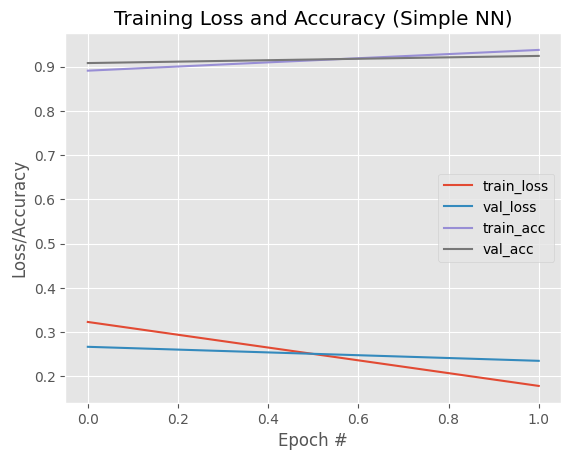

In [28]:
# строим графики потерь и точности
N = np.arange(0, H.params['epochs'])
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')

In [29]:
def save_model_and_labels(model, lb, model_path = "model_esat.keras", labels_path = "label_bin_esat"):
    """
    Сохраняет модель машинного обучения и метки классов в бинарном формате на диск.

    Args:
        model: Модель машинного обучения.
        lb: Метки классов.
        model_path: Путь к файлу модели.
        labels_path: Путь к файлу меток.

    Returns:
        None.
    """
    # Сохранение модели
    model.save(model_path, save_format="keras")
    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

In [30]:
model_path = "model_esat.keras"
labels_path = "label_bin_esat"
save_model_and_labels(model, label_mapping, model_path, labels_path)

In [31]:
!pip install -q gradio

In [32]:
def preprocess_image(img, compression_size=96):
    """
    Функция для изменения размера и предварительной обработки изображения.

    Args:
    img: Изображение.
    compression_size: Размер сжатия.

    Returns:
    Предобработанное изображение.
    """
    # Считываем изображение
    image = img.copy()
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    # Выполняем предварительную обработку для модели
    image = keras.applications.mobilenet_v2.preprocess_input(image)
    # Преобразуем изображение в формат, ожидаемый моделью Keras
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

    return image

In [37]:
def predict_image(img, preprocess_func=preprocess_image, model_path="model_esat.keras", label_path="label_bin_esat"):
    """
    Функция для выполнения предсказания класса, возвращает
    словарь с вероятностями для каждого класса.

    Args:
    img: Изображение.
    preprocess_func: Функция для предобработки изображения.
    model_path: Путь к файлу модели.
    label_path: Путь к файлу с метками.

    Returns:
    Словарь с метками и вероятностями для каждого класса.
    """
    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras
    with open(label_path, "rb") as f:
        lb = pickle.load(f)  # Загрузка словаря с метками
    # Инвертируем словарь, чтобы преобразовать метки классов из строковых значений в числовые
    label_mapping = {v: k for k, v in lb.items()}
    # Делаем предсказание на изображении
    image = preprocess_func(img)  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания
    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {label_mapping[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

In [34]:
import gradio as gr

In [38]:
# Создаем интерфейс Gradio
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(label_mapping)),
    examples=["/content/EuroSAT_RGB/River/River_1.jpg",
              "/content/EuroSAT_RGB/Highway/Highway_1.jpg",
              "/content/EuroSAT_RGB/Pasture/Pasture_100.jpg"], # Выходные данные: топ-N классов с наибольшей вероятностью
)
# Запускаем интерфейс
interface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://86aa50f0f04816f227.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 2s 2s/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://86aa50f0f04816f227.gradio.live


### **3.5. Анализ результатов:**
  * Проанализируйте влияние различных параметров на производительность модели, таких как:
      * Количество эпох обучения
      * Размер пакета
      * Функция активации
      * Оптимизатор
      * Регуляризация

-----------------------------------------
**Ваш вывод**
-----------------------------------------
